# Data Analytics Case Study 3: in-class exercise, weeks 1 & 2

Objectives

By the end of this group activity, students will:
*   Calculate simple and excess returns
*   Handle missing and duplicate values
*   Create and interpret moving averages
*   Visualize trends using Matplotlib
*   Discuss implications for trading strategies

##Task 1: Load and Preview the Data


*   Dataset: tsla.csv (included in  Module 1->Stock Data Overview->DAMO 611 Data Used zip file)

In [2]:
import pandas as pd
df=pd.read_csv('tsla.csv')
print(df.head())
print(df.info())

  Symbol        Date   Close    High       Low    Open   Volume
0   TSLA  2015-01-01  222.41  222.41  222.4100  222.41        0
1   TSLA  2015-01-02  219.31  223.25  213.2600  222.63  4764443
2   TSLA  2015-01-05  210.09  216.50  207.1626  214.50  5368477
3   TSLA  2015-01-06  211.28  214.20  204.2100  210.06  6261936
4   TSLA  2015-01-07  210.95  214.78  209.7800  213.40  2968390
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  808 non-null    object 
 1   Date    808 non-null    object 
 2   Close   808 non-null    float64
 3   High    808 non-null    float64
 4   Low     808 non-null    float64
 5   Open    808 non-null    float64
 6   Volume  808 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 44.3+ KB
None


##Task 2: Data Cleaning and Preparation



*   Check for and remove rows with any missing values
*   Check for and remove duplicate entries.
*   Convert Date to datetime format and sort the dataset by date.





In [3]:
print(df.isnull().sum())

Symbol    0
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [4]:
df.dropna(inplace=True)

In [5]:
print(df.duplicated().sum())

0


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df.sort_values(by='Date',inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.head())
print(df.info())

  Symbol       Date   Close    High       Low    Open   Volume
0   TSLA 2015-01-01  222.41  222.41  222.4100  222.41        0
1   TSLA 2015-01-02  219.31  223.25  213.2600  222.63  4764443
2   TSLA 2015-01-05  210.09  216.50  207.1626  214.50  5368477
3   TSLA 2015-01-06  211.28  214.20  204.2100  210.06  6261936
4   TSLA 2015-01-07  210.95  214.78  209.7800  213.40  2968390
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Symbol  808 non-null    object        
 1   Date    808 non-null    datetime64[ns]
 2   Close   808 non-null    float64       
 3   High    808 non-null    float64       
 4   Low     808 non-null    float64       
 5   Open    808 non-null    float64       
 6   Volume  808 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 44.3+ KB
None


##Task 3: Calculate Returns

*   Calculate simple daily return based on the Close price.
*   Calculate a 5-day annualized return assuming 252 trading days per year.
*   Calculate excess return by subtracting a fixed daily risk-free rate (e.g., 0.01% or 0.0001).









In [16]:
#measures the percentage change in price from one day to the next.
df['Simple_Return']=df['Close'].pct_change()
print(df.head())

  Symbol       Date   Close    High       Low    Open   Volume  Simple_Return  \
0   TSLA 2015-01-01  222.41  222.41  222.4100  222.41        0            NaN   
1   TSLA 2015-01-02  219.31  223.25  213.2600  222.63  4764443      -0.013938   
2   TSLA 2015-01-05  210.09  216.50  207.1626  214.50  5368477      -0.042041   
3   TSLA 2015-01-06  211.28  214.20  204.2100  210.06  6261936       0.005664   
4   TSLA 2015-01-07  210.95  214.78  209.7800  213.40  2968390      -0.001562   

   Annualized_Return  Excess_Return  
0                NaN            NaN  
1                NaN      -0.014038  
2                NaN      -0.042141  
3                NaN       0.005564  
4                NaN      -0.001662  


In [15]:
#calculate how the average 5-day return translates to a full year of returns
df['Annualized_Return']=((1+df['Simple_Return'].rolling(window=5).mean())**252)-1
print(df.head(10))

  Symbol       Date    Close      High       Low    Open    Volume  \
0   TSLA 2015-01-01  222.410  222.4100  222.4100  222.41         0   
1   TSLA 2015-01-02  219.310  223.2500  213.2600  222.63   4764443   
2   TSLA 2015-01-05  210.090  216.5000  207.1626  214.50   5368477   
3   TSLA 2015-01-06  211.280  214.2000  204.2100  210.06   6261936   
4   TSLA 2015-01-07  210.950  214.7800  209.7800  213.40   2968390   
5   TSLA 2015-01-08  210.615  213.7999  210.0100  212.81   3442509   
6   TSLA 2015-01-09  206.660  209.9800  204.9600  208.80   4668295   
7   TSLA 2015-01-12  202.210  204.4700  199.2500  203.05   5950280   
8   TSLA 2015-01-13  204.250  207.6100  200.9110  203.32   4477320   
9   TSLA 2015-01-14  192.690  195.2000  185.0000  185.83  11551855   

   Simple_Return  Annualized_Return  Excess_Return  
0            NaN                NaN            NaN  
1      -0.013938                NaN      -0.014038  
2      -0.042041                NaN      -0.042141  
3       0.005664 

In [14]:
#evaluate the risk-adjusted performance
#Gives a sense of how much better (or worse) the asset performed than a risk-free investment
risk_free_rate=0.0001
df['Excess_Return']=df['Simple_Return']-risk_free_rate
print(df.head(10))

  Symbol       Date    Close      High       Low    Open    Volume  \
0   TSLA 2015-01-01  222.410  222.4100  222.4100  222.41         0   
1   TSLA 2015-01-02  219.310  223.2500  213.2600  222.63   4764443   
2   TSLA 2015-01-05  210.090  216.5000  207.1626  214.50   5368477   
3   TSLA 2015-01-06  211.280  214.2000  204.2100  210.06   6261936   
4   TSLA 2015-01-07  210.950  214.7800  209.7800  213.40   2968390   
5   TSLA 2015-01-08  210.615  213.7999  210.0100  212.81   3442509   
6   TSLA 2015-01-09  206.660  209.9800  204.9600  208.80   4668295   
7   TSLA 2015-01-12  202.210  204.4700  199.2500  203.05   5950280   
8   TSLA 2015-01-13  204.250  207.6100  200.9110  203.32   4477320   
9   TSLA 2015-01-14  192.690  195.2000  185.0000  185.83  11551855   

   Simple_Return  Annualized_Return  Excess_Return  
0            NaN                NaN            NaN  
1      -0.013938                NaN      -0.014038  
2      -0.042041                NaN      -0.042141  
3       0.005664 

##Task 4: Moving Averages and Strategy Implementation

*   Calculate 10-day and 50-day moving averages of the Adj Close.
*   Implement a buy signal when MA10 > MA50, else 0 shares.
*   Calculate profit based on whether a share is held.
*   Calculate cumulative wealth.










In [18]:
df['MA10']=df['Close'].rolling(window=10).mean()
df['MA50']=df['Close'].rolling(window=50).mean()
df['Shares']=[1 if df.loc[i,'MA10']>df.loc[i,'MA50'] else 0 for i in df.index]
df['Close_tomorrow']=df['Close'].shift(-1)
df['Profit']=(df['Close_tomorrow']-df['Close'])*df['Shares']
df['Wealth']=df['Profit'].cumsum()
print(df.tail(30))

    Symbol       Date   Close      High      Low    Open   Volume  \
778   TSLA 2017-12-26  317.29  323.9400  316.580  323.83  4378413   
779   TSLA 2017-12-27  311.64  317.6800  310.750  316.00  4712111   
780   TSLA 2017-12-28  315.36  315.8200  309.540  311.75  4316347   
781   TSLA 2017-12-29  311.35  316.4100  310.000  316.18  3777155   
782   TSLA 2018-01-01  311.35  311.3500  311.350  311.35        0   
783   TSLA 2018-01-02  320.53  322.1099  311.000  312.00  4352241   
784   TSLA 2018-01-03  317.25  325.2500  315.550  321.00  4521527   
785   TSLA 2018-01-04  314.62  318.5500  305.680  312.87  9946304   
786   TSLA 2018-01-05  316.58  317.2400  312.000  316.62  4591180   
787   TSLA 2018-01-08  336.41  337.0199  315.500  316.00  9859435   
788   TSLA 2018-01-09  333.69  338.8000  327.405  335.16  7146631   
789   TSLA 2018-01-10  334.80  337.0000  330.000  332.20  4309926   
790   TSLA 2018-01-11  337.95  344.8099  333.260  335.24  6645484   
791   TSLA 2018-01-12  336.22  340

##Task 5: Visualization



*   Plot Close, MA10, and MA50 over time
*   Plot Cumulative wealth over time

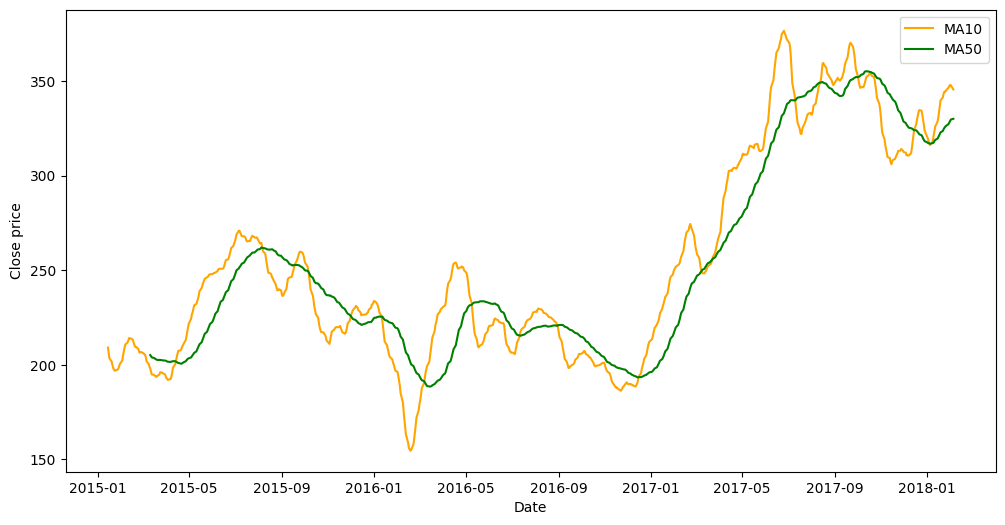

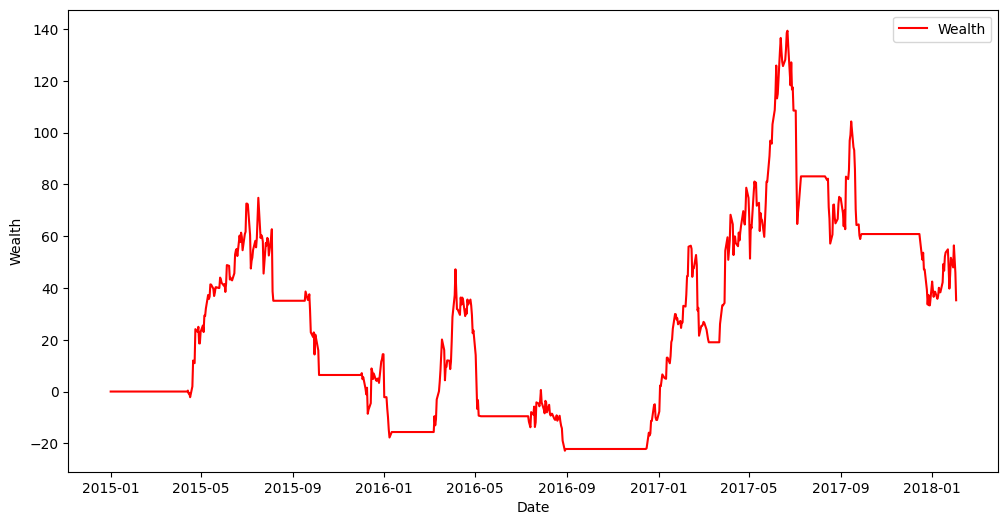

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['MA10'],label='MA10',color='orange')
plt.plot(df['Date'],df['MA50'],label='MA50',color='green')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend()
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Wealth'],label='Wealth',color='red')
plt.xlabel('Date')
plt.ylabel('Wealth')
plt.legend()
plt.show()

##Discussion


*   How did moving averages affect your buy/sell strategy?
*   What assumptions are we making in this simple strategy?
*   What are the risks of using historical prices for predicting future performance?








Moving averages created a trend-following mechanism that helped us decide when to buy or stay out of the market:


*   When the short-term (MA10) crossed above the long-term (MA50), it signaled positive momentum → we bought 1 share.
*   When the short-term dipped below the long-term → we held no position (sold or stayed in cash).

This strategy relies on several simplifying assumptions:


*   Zero transaction costs – It ignores fees for buying and selling, which would impact profits.
*   Immediate execution – Assumes we can buy/sell at the exact close price, with no slippage or delay.
*   One asset only – We’re trading a single stock, without considering portfolio diversification or risk management.
*   No short selling – We only profit from upward movements, not declines.
*   Historical patterns repeat – Assumes that past price trends can help predict future ones.

Using historical data to drive trading decisions involves several risks:


*   Overfitting: A strategy that worked in the past may not generalize to future conditions.
*   Regime changes: Market behavior may shift due to economic changes, policy, or unexpected events (e.g., pandemics, rate hikes).
*   Survivorship bias: Past data may only reflect stocks that survived, ignoring failures.
*   Ignored variables: External factors like earnings reports, macroeconomic data, or global news aren’t captured by price alone.
